# HW 2: Part II: Computer Assignment

In [67]:
#Import appropriate libraries

import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from pandas import read_csv
import pandas as pd

# 1. Load Data

In [68]:
fill_vals = {           'Lot.Area':0, 'Order': 0, 'PID': 0, 'Lot.Frontage':0, 
                        'Year.Built':0,'Mas.Vnr.Area':0, 'BsmtFin.SF.1':0, 
                        'BsmtFin.SF.2':0,'Bsmt.Unf.SF': 0 , 'Total.Bsmt.SF':0, 
                        'X1st.Flr.SF':0,'X2nd.Flr.SF':0, 'Low.Qual.Fin.SF':0, 
                        'Gr.Liv.Area':0,'Garage.Area':0, 'Wood.Deck.SF':0, 
                        'Open.Porch.SF':0,'Enclosed.Porch':0, 'X3Ssn.Porch':0, 
                        'Screen.Porch':0,'Pool.Area':0,'Garage.Yr.Blt':0, 
                        'Misc.Val':0, 'SalePrice': 0, 'MS.SubClass':'m', 'MS.Zoning':'m', 'Street':'m',
                        'Alley':'m', 'Lot.Shape':'m', 'Land.Contour':'m',
                        'Utilities':'m', 'Lot.Config':'m', 'Land.Slope':'m',
                        'Neighborhood':'m', 'Condition.1':'m', 'Condition.2':'m',
                        'Bldg.Type':'m', 'House.Style':'m', 'Overall.Qual':'m',
                        'Overall.Cond':'m', 'Roof.Style':'m', 'Roof.Matl':'m',
                        'Exterior.1st':'m', 'Exterior.2nd':'m', 'Mas.Vnr.Type':'m',
                        'Exter.Qual':'m', 'Exter.Cond':'m', 'Foundation':'m',
                        'Bsmt.Qual':'m', 'Bsmt.Cond':'m', 'Bsmt.Exposure':'m',
                        'BsmtFin.Type.1':'m','BsmtFin.Type.2':'m', 'Heating':'m', 'Heating.QC':'m',
                        'Central.Air':'m', 'Electrical':'m', 'Bsmt.Full.Bath':'m',
                        'Bsmt.Half.Bath':'m', 'Full.Bath':'m', 'Half.Bath':'m',
                        'Bedroom.AbvGr':'m', 'Kitchen.AbvGr':'m', 'Kitchen.Qual':'m',
                        'TotRms.AbvGrd':'m', 'Functional':'m', 'Fireplaces':'m',
                        'Fireplace.Qu':'m', 'Garage.Type':'m', 'Garage.Cars':'m',
                        'Garage.Qual':'m', 'Garage.Cond':'m', 'Paved.Drive':'m',
                        'Pool.QC':'m', 'Fence':'m', 'Sale.Type':'m', 
                        'Sale.Condition':'m', 'Misc.Feature':'m',  'Garage.Finish':'m',
                        'Mo.Sold': 'm', 'Yr.Sold': 'm', 'Year.Remod.Add': 'm'}


data = read_csv('ames.csv')
print(len(fill_vals))

82


# 2. Preprocessing

In [69]:
#Question: We only have 71 variables in the numerical and discrete categories, what do we do about filling others?

data = data.fillna(value = fill_vals)
data.to_csv('data_filled.csv')

# 3. Split Data into Train, Test and Validation

In [70]:
print(data.columns)
validation = data.loc[data['Order'] % 5 == 3] #Validation set is value % 5 == 3
test = data.loc[data['Order'] % 5 == 4]  #Test set is value % 5 == 3
train = data.loc[(data['Order'] % 5 != 3) & (data['Order']% 5 != 4)] # Rest of the data

print(validation.shape)
print(test.shape)
print(train.shape)
#All of the above add up to 2930


Index(['Order', 'PID', 'MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area',
       'Street', 'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities',
       'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1',
       'Condition.2', 'Bldg.Type', 'House.Style', 'Overall.Qual',
       'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Roof.Style',
       'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type',
       'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual',
       'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1',
       'BsmtFin.Type.2', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF',
       'Heating', 'Heating.QC', 'Central.Air', 'Electrical', 'X1st.Flr.SF',
       'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath',
       'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr',
       'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace.Qu', 'Garage.Type', 'Garage.Yr.Blt',
    

# 4. Predict the sale price based on the "Gr Liv Area" feature

y = 119.998298x + -0.000000


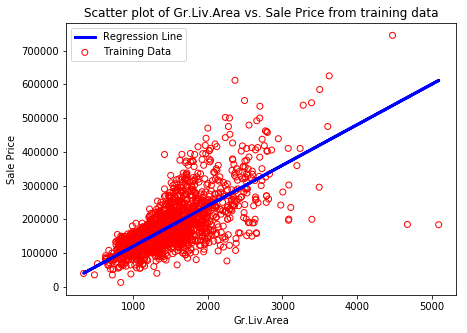

In [71]:
#Question: How do we get w0

train_Gr = np.asarray(train['Gr.Liv.Area'])
train_saleprice = np.asarray(train['SalePrice'])

w1 = 1/(np.dot(np.transpose(train_Gr), train_Gr))
w2 = np.dot(w1,np.transpose(train_Gr))
w = np.dot(w2,np.transpose(train_saleprice)) 

y_hat = w*train_Gr

plt.figure(figsize = (7,5))
plt.scatter(train['Gr.Liv.Area'], train['SalePrice'], facecolors='none', edgecolors='r', label='Training Data')
plt.plot(train_Gr, y_hat, color='blue', linewidth=3, label = 'Regression Line')
plt.legend()
plt.title('Scatter plot of Gr.Liv.Area vs. Sale Price from training data')
plt.xlabel('Gr.Liv.Area')
plt.ylabel('Sale Price')


x = [train_Gr[0], train_Gr[1756]] 
y = [y_hat[0], y_hat[1756]] 

coefficients = np.polyfit(x, y, 1)
print('y = %fx + %f'% (coefficients[0], coefficients[1]))


In [136]:
#Applying to validation set
from sklearn.metrics import mean_squared_error
from math import sqrt

val_Gr = np.asarray(validation['Gr.Liv.Area'])
val_saleprice = np.asarray(validation['SalePrice'])
test_Gr = np.asarray(test['Gr.Liv.Area'])
test_saleprice = np.asarray(test['SalePrice'])


y_hat_val = w*val_Gr
rms_v_sing = sqrt(mean_squared_error(val_saleprice, y_hat_val))

y_hat_test = w*test_Gr
rms_test_sing = sqrt(mean_squared_error(test_saleprice, y_hat_test))

print('Validation RMSE: ', rms_v_sing)
print('Test RMSE: ', rms_test_sing)

Validation RMSE:  56296.77610256447
Test RMSE:  55835.71252086333


# 5. One Hot Encoding

In [73]:
cat_feats = [           'MS.SubClass', 'MS.Zoning', 'Street',
                        'Alley', 'Lot.Shape', 'Land.Contour',
                        'Utilities', 'Lot.Config', 'Land.Slope',
                        'Neighborhood', 'Condition.1', 'Condition.2',
                        'Bldg.Type', 'House.Style', 'Overall.Qual',
                        'Overall.Cond', 'Roof.Style', 'Roof.Matl',
                        'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type',
                        'Exter.Qual', 'Exter.Cond', 'Foundation',
                        'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure',
                        'BsmtFin.Type.1','BsmtFin.Type.2','Heating', 'Heating.QC',
                        'Central.Air', 'Electrical', 'Bsmt.Full.Bath',
                        'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath',
                        'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual',
                        'TotRms.AbvGrd', 'Functional', 'Fireplaces',
                        'Fireplace.Qu', 'Garage.Type', 'Garage.Cars',
                        'Garage.Qual', 'Garage.Cond', 'Paved.Drive',
                        'Pool.QC', 'Fence', 'Sale.Type', 'Sale.Condition', 'Misc.Feature', 
                        'Garage.Finish','Mo.Sold', 'Yr.Sold', 'Year.Remod.Add']

data_enc = pd.get_dummies(data, prefix_sep="_", columns=cat_feats)


## Split encoded data into train, test and validate

In [74]:
print(data_enc.columns)
validationE = data_enc.loc[data_enc['Order'] % 5 == 3] #Validation set is value % 5 == 3
testE = data_enc.loc[data_enc['Order'] % 5 == 4]  #Test set is value % 5 == 3
trainE = data_enc.loc[(data_enc['Order'] % 5 != 3) & (data_enc['Order']% 5 != 4)] # Rest of the data

print(validationE.shape)
print(testE.shape)
print(trainE.shape)

Index(['Order', 'PID', 'Lot.Frontage', 'Lot.Area', 'Year.Built',
       'Mas.Vnr.Area', 'BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Unf.SF',
       'Total.Bsmt.SF',
       ...
       'Year.Remod.Add_2001', 'Year.Remod.Add_2002', 'Year.Remod.Add_2003',
       'Year.Remod.Add_2004', 'Year.Remod.Add_2005', 'Year.Remod.Add_2006',
       'Year.Remod.Add_2007', 'Year.Remod.Add_2008', 'Year.Remod.Add_2009',
       'Year.Remod.Add_2010'],
      dtype='object', length=476)
(586, 476)
(586, 476)
(1758, 476)


## Train the Linear Regression model on the newly encoded dataset  

In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from math import sqrt

#Assuming that we are still estimating the sale price. 

y = np.asarray(trainE['SalePrice'])
X = np.asarray(trainE.drop('SalePrice', axis=1))

reg = LinearRegression(fit_intercept = True).fit(X, y)

## RMSE on Validation Set

In [135]:
from sklearn.metrics import mean_squared_error
from math import sqrt

val_y = np.asarray(validationE['SalePrice'])
val_X = np.asarray(validationE.drop('SalePrice', axis=1))

test_y = np.asarray(testE['SalePrice'])
test_X = np.asarray(testE.drop('SalePrice', axis=1))

y_hat_val = reg.predict(val_X)
rms_v_lin = sqrt(mean_squared_error(val_y, y_hat_val))

y_hat_test = reg.predict(test_X)
rms_test_lin = sqrt(mean_squared_error(test_y, y_hat_test))

print('Validation Rmse: ', rms_v_lin)
print('Test Rmse: ', rms_test_lin)

Validation Rmse:  27240.684937989266
Test Rmse:  36398.518508693815


# 6. Regularization

## Normalize Training Data and train

In [77]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler


num_feats = [           'Lot.Area', 'Order', 'PID', 'Lot.Frontage', 
                        'Year.Built','Mas.Vnr.Area', 'BsmtFin.SF.1', 
                        'BsmtFin.SF.2','Bsmt.Unf.SF' , 'Total.Bsmt.SF', 
                        'X1st.Flr.SF','X2nd.Flr.SF', 'Low.Qual.Fin.SF', 
                        'Gr.Liv.Area','Garage.Area', 'Wood.Deck.SF', 
                        'Open.Porch.SF','Enclosed.Porch', 'X3Ssn.Porch', 
                        'Screen.Porch','Pool.Area','Garage.Yr.Blt', 
                        'Misc.Val']



test_e = data_enc.loc[data_enc['Order'] % 5 == 4]  #Test set is value % 5 == 3
train_e = data_enc.loc[data_enc['Order']% 5 != 4] # Rest of the data
train_e2 = data_enc.loc[(data_enc['Order'] % 5 != 3) & (data_enc['Order']% 5 != 4)]


norm_train_e = train_e.drop('SalePrice', axis=1)
norm_train_e[num_feats] = norm_train_e[num_feats] = norm_train_e[num_feats].apply(lambda x: (x - x.min()) / (x.max() - x.min()))#StandardScaler().fit_transform(norm_train_e[num_feats])

norm_train_e2 = train_e2.drop('SalePrice', axis=1)
norm_train_e2[num_feats] = norm_train_e2[num_feats] = norm_train_e2[num_feats].apply(lambda x: (x - x.min()) / (x.max() - x.min()))#StandardScaler().fit_transform(norm_train_e2[num_feats])


norm_test_e = test_e.drop('SalePrice', axis=1)
norm_test_e[num_feats] = norm_test_e[num_feats].apply(lambda x: (x - x.min()) / (x.max() - x.min()))#StandardScaler().fit_transform(norm_test_e[num_feats])

y_cv = train_e['SalePrice']
y_cv2 = train_e2['SalePrice']




## Cross-Validate

In [123]:
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

alphas = []
training_rmse = []
valid_rmse = []

clf = linear_model.Lasso()

#Cross validate for values of alpha
for alpha in range (50, 550, 50):
    
    clf.set_params(alpha=alpha)
    scores = cross_val_score(clf, norm_train_e, y_cv,scoring ='mean_squared_error', cv = 5)
    scores = np.sqrt(np.abs(scores))
    trmse = scores.mean()
    predictions = cross_val_predict(clf, norm_train_e, y_cv , cv = 5)
    vrmse = sqrt(abs(mse(y_cv, predictions)))
    
    valid_rmse.append(vrmse)
    training_rmse.append(trmse)
    alphas.append(alpha)
    
    print(alpha)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was re

50


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was re

100


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was re

150


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was re

200


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was re

250


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was re

300


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was re

350


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was re

400


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was re

450


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was re

500


1
1
100
27505.782634697403


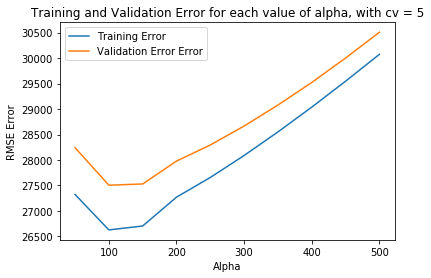

In [124]:
from matplotlib import pyplot as plt

plt.plot(alphas,training_rmse, label='Training Error')
plt.plot(alphas,valid_rmse, label='Validation Error Error')
plt.title('Training and Validation Error for each value of alpha, with cv = 5')
plt.xlabel('Alpha')
plt.ylabel('RMSE Error')
plt.legend()

print(np.argmin(valid_rmse))
print(np.argmin(training_rmse))
print(alphas[1])
rms_v_reg = min(valid_rmse)
print(valid_rmse[1])

# 7. Compare test models

Test Error:  30609.116376110924


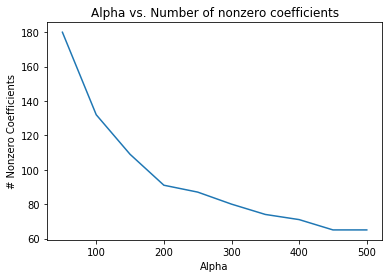

In [133]:
from sklearn.metrics import mean_squared_error as mse

test_y = test_e['SalePrice']
coeffs = []

for alpha in alphas:

    clf = linear_model.Lasso(alpha = alpha)
    clf.fit(norm_train_e, y_cv)
    coeffs.append(np.count_nonzero(clf.coef_))

plt.plot(alphas,coeffs)
plt.title('Alpha vs. Number of nonzero coefficients')
plt.xlabel('Alpha')
plt.ylabel('# Nonzero Coefficients')

clf = linear_model.Lasso(alpha = 100)
clf.fit(norm_train_e2, y_cv2)

y_hat_test = clf.predict(norm_test_e)
rms_test_reg = sqrt(mean_squared_error(test_y, y_hat_test))
print('Test Error: ', rms_test_reg)

Text(0.5,1,'RMSE for Test Set')

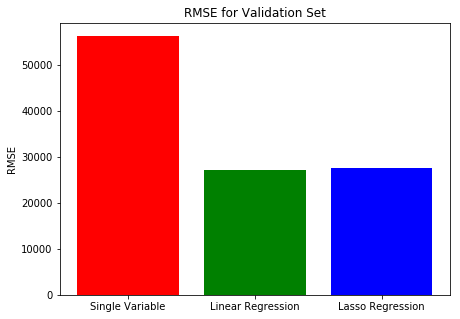

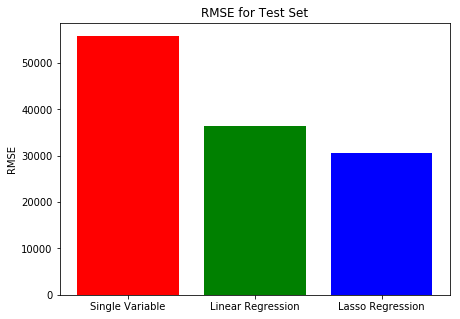

In [126]:
import matplotlib.pyplot as plt


Classifiers = ['Single Variable', 'Linear Regression', 'Lasso Regression']
Acc_val = [rms_v_sing, rms_v_lin, rms_v_reg]
Acc_test = [rms_test_sing, rms_test_lin, rms_test_reg]


fig, ax = plt.subplots(figsize = (7,5))
vnb, vlda, vqda = plt.bar(Classifiers, Acc_val)
vnb.set_facecolor('r')
vlda.set_facecolor('g')
vqda.set_facecolor('b')
ax.set_ylabel('RMSE')
plt.title('RMSE for Validation Set')

fig, ax = plt.subplots(figsize = (7,5))
vnb, vlda, vqda = plt.bar(Classifiers, Acc_test)
vnb.set_facecolor('r')
vlda.set_facecolor('g')
vqda.set_facecolor('b')
ax.set_ylabel('RMSE')
plt.title('RMSE for Test Set')